# 파이토치의 구성요소
- `torch`: 텐서를 생성하는 라이브러리
- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망을 생성하는 라이브러리
- `torch.multiprocessing`: 병렬처리 기능을 제공하는 라이브러리
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드
- `torch.onnx`: ONNX(open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

# 텐서(Tensors)
- NumPy의 ndarray와 유사
- GPU를 사용한 연산 가속도 가능

## 텐서 정의

In [1]:
import torch

In [2]:
torch.__version__

'1.9.0+cu111'

초기화 되지 않은 행렬

In [6]:
x = torch.empty(4,2)
print(x)

tensor([[-1.2117e+17,  4.5705e-41],
        [ 2.8661e+13,  3.0939e-41],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]])


무작위로 초기화된 행렬

In [7]:
x = torch.rand(4,2)
print(x)

tensor([[0.5251, 0.4808],
        [0.3205, 0.2710],
        [0.7869, 0.4610],
        [0.8499, 0.5745]])


dtype이 long, 0으로 채워진 텐서

In [8]:
x = torch.zeros(4,2,dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [9]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [10]:
x = x.new_ones(2,4,dtype=torch.float64)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[-0.6577,  0.7341,  1.2571,  2.2175],
        [-0.4741,  1.2834,  2.1248,  1.1039]])


## 텐서의 크기

In [9]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산

- 덧셈1

In [10]:
y = torch.rand(2,4)
print(y)
print(x+y)

tensor([[0.9032, 0.0518, 0.9202, 0.8010],
        [0.7100, 0.6169, 0.7724, 0.8333]])
tensor([[0.2455, 0.7859, 2.1773, 3.0186],
        [0.2358, 1.9004, 2.8973, 1.9371]])


- 덧셈2

In [11]:
print(torch.add(x,y))

tensor([[0.2455, 0.7859, 2.1773, 3.0186],
        [0.2358, 1.9004, 2.8973, 1.9371]])


- 덧셈3

In [12]:
result = torch.empty(2,4)
torch.add(x,y,out=result)
print(result)

tensor([[0.2455, 0.7859, 2.1773, 3.0186],
        [0.2358, 1.9004, 2.8973, 1.9371]])


- 덧셈4
    - in-place 방식, `_` 에 주의

In [13]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[-0.6577,  0.7341,  1.2571,  2.2175],
        [-0.4741,  1.2834,  2.1248,  1.1039]])
tensor([[0.9032, 0.0518, 0.9202, 0.8010],
        [0.7100, 0.6169, 0.7724, 0.8333]])
tensor([[0.2455, 0.7859, 2.1773, 3.0186],
        [0.2358, 1.9004, 2.8973, 1.9371]])


- 뺄셈

In [14]:
x = torch.Tensor([[1,3]
                 ,[5,7]])
y = torch.Tensor([[2,4]
                 ,[6,8]])
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))
print(x)

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[1., 3.],
        [5., 7.]])


- 곱셈

In [15]:
x = torch.Tensor([[1,3]
                 ,[5,7]])
y = torch.Tensor([[2,4]
                 ,[6,8]])
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


- 나눗셈

In [16]:
x = torch.Tensor([[1,3]
                 ,[5,7]])
y = torch.Tensor([[2,4]
                 ,[6,8]])
print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


- dot product (matrix multiply)

In [17]:
x = torch.Tensor([[1,3]
                 ,[5,7]])
y = torch.Tensor([[2,4]
                 ,[6,8]])
print(torch.mm(x,y))

tensor([[20., 28.],
        [52., 76.]])


## 인덱싱
- $A\big[dim=0\big]\big[dim=1\big]\big[dim=2\big]...$

In [18]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [19]:
print(x[:,1])

tensor([3., 7.])


## View
- 텐서의 크기(size)나 모양(shape)을 변경. `reshape` 과 유사

In [20]:
x = torch.randn(4,5)
y = x.view(20)
z = x.view(5,-1)

print(x)
print(y)
print(z)

tensor([[ 0.6661,  0.3061,  0.0466,  0.1768, -1.7192],
        [ 0.2824,  0.5800,  1.7399, -1.5177,  0.8940],
        [-0.3962,  0.0958, -0.6235,  0.6887,  0.5538],
        [-1.1011,  1.7656, -1.4480,  1.2823,  0.0092]])
tensor([ 0.6661,  0.3061,  0.0466,  0.1768, -1.7192,  0.2824,  0.5800,  1.7399,
        -1.5177,  0.8940, -0.3962,  0.0958, -0.6235,  0.6887,  0.5538, -1.1011,
         1.7656, -1.4480,  1.2823,  0.0092])
tensor([[ 0.6661,  0.3061,  0.0466,  0.1768],
        [-1.7192,  0.2824,  0.5800,  1.7399],
        [-1.5177,  0.8940, -0.3962,  0.0958],
        [-0.6235,  0.6887,  0.5538, -1.1011],
        [ 1.7656, -1.4480,  1.2823,  0.0092]])


## Item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [21]:
x = torch.rand(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.0330])
0.03295695781707764
torch.float32


- 스칼라값 하나만 존재해야함

In [22]:
x = torch.rand(2)
print(x)
print(x.item())
print(x.dtype)

tensor([0.5249, 0.8407])


ValueError: only one element tensors can be converted to Python scalars

## Squeeze
- 차원을 축소 (제거)

In [23]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.7479, 0.6833, 0.1620],
         [0.6006, 0.7400, 0.6154],
         [0.2296, 0.8284, 0.1813]]])
torch.Size([1, 3, 3])


In [24]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.7479, 0.6833, 0.1620],
        [0.6006, 0.7400, 0.6154],
        [0.2296, 0.8284, 0.1813]])
torch.Size([3, 3])


## Unsqueeze

In [25]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.4341, 0.0425, 0.5948],
         [0.2327, 0.1360, 0.5504],
         [0.4257, 0.0848, 0.1522]]])
torch.Size([1, 3, 3])


In [26]:
t = tensor.unsqueeze(dim=0)
print(t)
print(t.shape)

tensor([[[[0.4341, 0.0425, 0.5948],
          [0.2327, 0.1360, 0.5504],
          [0.4257, 0.0848, 0.1522]]]])
torch.Size([1, 1, 3, 3])


## Stack
- 텐서간 결합

In [27]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])
print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


## Cat
- 텐서를 결합하는 메소드
- NumPy의 `stack`과 유사하지만, 쌓을 dim이 존재해야함.
    - 예를 들어, 해당 차원을 늘려준 후 결합

In [28]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b),dim=0)
d = torch.cat((a,b),dim=1)
print(c)
print(c.size())
print(d)
print(d.size())

tensor([[[[ 0.5359, -0.6511, -1.5194],
          [ 0.4947,  0.5567,  0.1570],
          [ 0.1997, -1.3571, -1.1620]]],


        [[[ 0.1295,  0.9096,  1.6654],
          [-0.6342,  1.1649, -0.5457],
          [-0.1279, -0.5290, -1.4380]]]])
torch.Size([2, 1, 3, 3])
tensor([[[[ 0.5359, -0.6511, -1.5194],
          [ 0.4947,  0.5567,  0.1570],
          [ 0.1997, -1.3571, -1.1620]],

         [[ 0.1295,  0.9096,  1.6654],
          [-0.6342,  1.1649, -0.5457],
          [-0.1279, -0.5290, -1.4380]]]])
torch.Size([1, 2, 3, 3])


## Chunk
- 텐서를 여러 개로 나눌 때 사용
- '몇 개'의 텐서로 나눌 것이냐

In [29]:
tensor = torch.rand(3,6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.6767, 0.0473, 0.9995, 0.6440, 0.6590, 0.5847],
        [0.5818, 0.0760, 0.4276, 0.6215, 0.9101, 0.4663],
        [0.8583, 0.3742, 0.8783, 0.7227, 0.3171, 0.5839]])
tensor([[0.6767, 0.0473],
        [0.5818, 0.0760],
        [0.8583, 0.3742]])
tensor([[0.9995, 0.6440],
        [0.4276, 0.6215],
        [0.8783, 0.7227]])
tensor([[0.6590, 0.5847],
        [0.9101, 0.4663],
        [0.3171, 0.5839]])


## Split
- `chunk`와 동일한 기능이지만 조금 다름
- 하나의 텐서당 '크기'가 얼마이냐

In [30]:
## tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.6767, 0.0473, 0.9995, 0.6440, 0.6590, 0.5847],
        [0.5818, 0.0760, 0.4276, 0.6215, 0.9101, 0.4663],
        [0.8583, 0.3742, 0.8783, 0.7227, 0.3171, 0.5839]])
tensor([[0.6767, 0.0473, 0.9995],
        [0.5818, 0.0760, 0.4276],
        [0.8583, 0.3742, 0.8783]])
tensor([[0.6440, 0.6590, 0.5847],
        [0.6215, 0.9101, 0.4663],
        [0.7227, 0.3171, 0.5839]])


## torch $\leftrightarrow$ numpy
- Torch Tensor를 Numpy Array로 변환 가능
    - `numpy()`
    - `from_numpy()`
- (참고)
    - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함.

In [31]:
a = torch.ones(7)
print(a)
b = a.numpy()
print(b)
a.add_(a)
print(a)
print(b)

tensor([1., 1., 1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [32]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


# CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
    - 예) cpu, gpu

In [11]:
import torch

In [12]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.5145])
-0.5145356059074402
torch.float32


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double))

cuda
tensor([0.4855], device='cuda:0')
tensor([0.4855], dtype=torch.float64)


# AUTOGRAD (자동미분)
- autograd 패키지는 tensork의 모든  연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop를 위한 미분값을 자동으로 계산

## Tensor
- data: tensor 형태의 데이터
- `grad`: data가 거쳐온 layer에 대한 미분값 저장
- `grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)
- `require_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작
- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 gradient를 계산할 수 있으며, `.grad` 속성에 누정된
- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리
- 기록을 추적하는 것을 방지하기 위해 코드블럭을 `with torch.no_grad():`로 감싸면 gradient는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가할 때 유용
- Autograd 구현에서 매우 중요한 클래스: `Function` 클래스

In [36]:
import torch

In [37]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [38]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [39]:
print(y.grad_fn)

In [40]:
z = y * y * 2
out = z.mean()
print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)` 는 기존 텐서의 `requires_grad` 값을 바꿔치기(in-place)하여 변경

In [41]:
a = torch.rand(3,3)
a = ((a*3)/(a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn)

False
True


## Gradient
- 역전파: `.backward()` 를 통해 역전파 계산 가능

In [42]:
out.backward()

In [43]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [44]:
x = torch.randn(3, requires_grad=True)

y = x*2
while y.data.norm() < 1000:
    y *= 2

print(y)

tensor([-352.1407, 1008.4608, -385.0521], grad_fn=<MulBackward0>)


In [45]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- `with torch.no_grad()` 를 이용하여 gradient 의 업데이트를 하지 않음

In [46]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 `requires_grad` 가 다른 새로운 Tensor 를 가져올 때

In [47]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


## 자동 미분 흐름 다시 보기(1)
- 계산 흐름\
$a \rightarrow b \rightarrow c \rightarrow out$
## $\frac{\partial out}{\partial a} = ?$

- backward() 를 통해
$a \leftarrow b \leftarrow c \leftarrow out$ 을 계산하면\
$\frac{\partial out}{\partial a}$ 값이 a.grad 에 채워짐

In [48]:
import torch

In [49]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [50]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [51]:
print("a.data:",a)
print("a.grad:",a.grad)
print("a.grad_fn:",a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn: None


- $b=a+2$

In [52]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c=b^2$

In [53]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


- final output

In [54]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [55]:
out.backward()

- a의 `grad_fn`이 None인 이유:\
    직접적으로 계산한 부분이 없었기 때문

In [56]:
print("a.data:",a)
print("a.grad:",a.grad)
print("a.grad_fn:",a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


- b, c는 gradient 값이 필요하지 않기 때문에 `None`

In [57]:
print("b.data:",b)
print("b.grad:",b.grad)
print("b.grad_fn:",b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7f0a603fafd0>


/tmp/ipykernel_871295/1859589111.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("b.grad:",b.grad)


In [58]:
print("c.data:",c)
print("c.grad:",c.grad)
print("c.grad_fn:",c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7f0a603faf10>


/tmp/ipykernel_871295/2383004956.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("c.grad:",c.grad)


## 자동 미분 흐름 다시 보기(2)
- gard 값을 넣어서 backward

In [59]:
x = torch.ones(3, requires_grad=True)
print(x)
y = x ** 2
print(y)
z = y ** 2 + x
print(z)
out = z.sum()
print(out)

tensor([1., 1., 1.], requires_grad=True)
tensor([1., 1., 1.], grad_fn=<PowBackward0>)
tensor([2., 2., 2.], grad_fn=<AddBackward0>)
tensor(6., grad_fn=<SumBackward0>)


In [60]:
print(x)

tensor([1., 1., 1.], requires_grad=True)


In [61]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [62]:
print("x.data:",x)
print("x.grad:",x.grad)
print("x.grad_fn:",x.grad_fn)

x.data: tensor([1., 1., 1.], requires_grad=True)
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [63]:
print("y.data:",y)
print("y.grad:",y.grad)
print("y.grad_fn:",y.grad_fn)

y.data: tensor([1., 1., 1.], grad_fn=<PowBackward0>)
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7f0a64eedb80>


/tmp/ipykernel_871295/1132046467.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("y.grad:",y.grad)


In [64]:
print("z.data:",z)
print("z.grad:",z.grad)
print("z.grad_fn:",z.grad_fn)

z.data: tensor([2., 2., 2.], grad_fn=<AddBackward0>)
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7f0a603bc070>


/tmp/ipykernel_871295/1960256943.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("z.grad:",z.grad)


# nn & nn.functional
- 두 패키지가 같은 기능이지만 방식이 조금 다름
- 위의 `autograd` 관련 작업들은 두 패키지를 통해 진행할 수 있음
- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음
- 결론적으로, `torch.nn`은 atrribute 를 활용해 state 를 저장하고 활용하고, `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능

## nn 패키지
- 주로 가중치(weight), 편향(bias) 값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때
    - 따라서 `weight`값들을 직접 선언 안함
- 예시
    - Containers
    - Convolution Layers
    - Pooling Layers
    - Padding Layers
    - Non-linear Activations (weighted sum, nonlinearity)
    - Non-linear Activations (other)
    - Normalization Layers
    - Recurrent Layers
    - Transformer Layers
    - Linear Layers
    - Dropout Layers
    - Sparse Layers
    - Distance Functions
    - Loss Functions
    - etc.
- https://pytorch.org/docs/stable/nn.html

In [65]:
import torch
import torch.nn as nn

- Convolution Layer 예시
    - input_channel_size: depth (=16)
    - output_volume_size: A number of output layers (=33)
    - kernel_size: filter_size ('3' uses 3x3 filter)

In [66]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))

m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))

input = torch.randn(20, 16, 50, 100)
output = m(input)

- output: [batch_size, n_features_conv, height, width]

In [67]:
output.shape

torch.Size([20, 33, 26, 100])

## nn.functional 패키지
- 가중치를 직접 선언하여 인자로 넣어줘야함
- 예시
    - Convolution Functions
    - Pooling Functions
    - Non-linear Activations Functions
    - Normalization Functions
    - Linear Functions
    - Dropout Functions
    - Sparse Functions
    - Distance Functions
    - Loss Functions
    - etc.
- https://pytorch.org/docs/stable/nn.functional.html

In [68]:
import torch
import torch.nn.functional as F

In [69]:
filters = torch.randn(8,4,3,3)

In [70]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

# Torchvision
- `transforms`: 전처리할 때 사용하는 메소드
- `transforms`에서 제공하는 클래스 외에 일반적으로 클래스를 따로 만들어 전처리 단계를 진행
    - 아래의 코드에서 다양한 전처리 기술 확인\
    https://pytorch.org/vision/stable/transforms.html

In [71]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시
    - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음
    - `Compose`를 통해 리스트 안에 순서대로 전처리 진행
    - 대표적인 예로, `ToTensor()`를 하는 이유는 <u>torchvision이 PIL image 형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [72]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, etc.

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [73]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [74]:
trainset = torchvision.datasets.MNIST(root='./content'
                                     , train=True
                                     , download=True
                                     , transform=transform)
testset = torchvision.datasets.MNIST(root='./content'
                                     , train=False
                                     , download=True
                                     , transform=transform)

/home/sungbeenpark/anaconda3/envs/algonauts/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [75]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size=8`만큼 데이터를 하나씩 가져옴

In [76]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

`torch.Size = [batch, channel(gray), 28*28]`

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`, i.e., [8, 1, 28, 28] = [batch, channel, height, width]

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [77]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [78]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [79]:
image = torch_image.numpy()
image.shape

(28, 28)

In [80]:
label = labels[0].numpy()
label.shape

()

In [81]:
label

array(4)

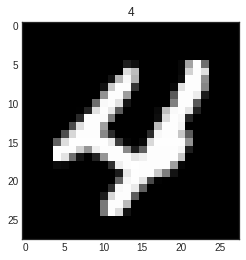

In [82]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [84]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [85]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [86]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [87]:
weight = weight.detach()

In [88]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

<function matplotlib.pyplot.show(close=None, block=None)>

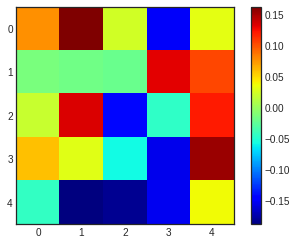

In [89]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show

In [90]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [91]:
input_image = torch.unsqueeze(images[0], dim=0)

In [92]:
output_data = layer(input_image)

In [93]:
output = output_data.data

In [94]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

<function matplotlib.pyplot.show(close=None, block=None)>

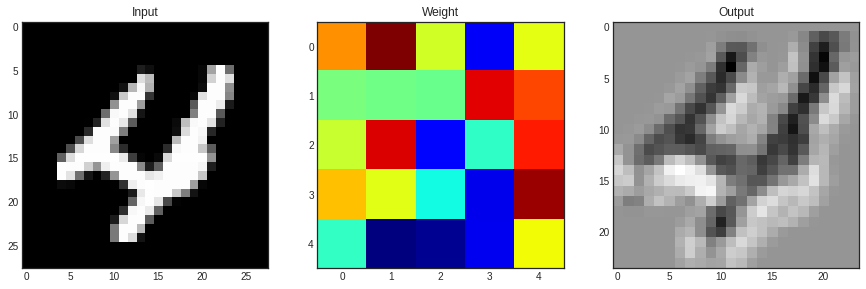

In [95]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0,0,:,:], 'jet')
plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:], 'gray')

plt.show

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [96]:
image.shape

(28, 28)

In [97]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

/home/sungbeenpark/anaconda3/envs/algonauts/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [98]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

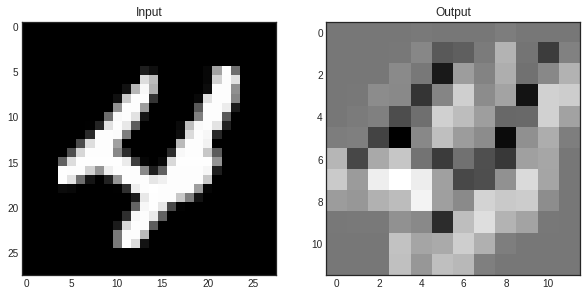

In [99]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title("Input")
plt.imshow(image,'gray')
plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0,0,:,:],'gray')

plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [100]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [101]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

- nn.Linear(in_features, out_features, bias=True)
    - in_features – size of each input sample
    - out_features – size of each output sample
    - bias – If set to False, the layer will not learn an additive bias. Default: True

In [102]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [103]:
lin

tensor([[ 0.1350, -0.2596,  0.1234,  0.2215, -0.0381, -0.0442,  1.1028, -0.1074,
         -0.3203,  0.6248]], grad_fn=<AddmmBackward>)

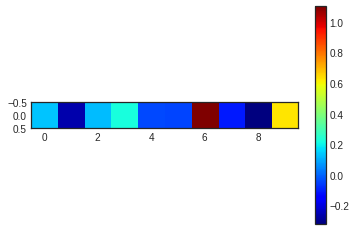

In [104]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [105]:
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784,10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [106]:
softmax

tensor([[0.0504, 0.0825, 0.1048, 0.0952, 0.1344, 0.1708, 0.0376, 0.1899, 0.0379,
         0.0964]])

In [107]:
import numpy as np

In [108]:
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [109]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [110]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

